# 线段绘制

> 本章节算法和代码引用了 Dmitry V. Sokolov 的 [tinyrenderer](https://github.com/ssloy/tinyrenderer) 第一章线段光栅化过程。在原算法的基础上，本章节做了整理、改进和重构。感谢 Dmitry V. Sokolov 将这一段算法整理成册，并开源地发布在 GitHub 供所有人使用。

在上一单元，我们了解了颜色的表示方式，基础颜色的绘制，以及基础的着色过程。对于着色过程，我们还引入了现代GPU的着色器的概念，并简单地描述了像素着色器。在这一章，我们将通过代码绘制最基础的几何图形，线段，的绘制。

在数学上，线段由两个端点和端点的连线构成。对于任何一个线段，我们可以通过线段的方程$f(x)=ax+b$来进行描述，或者我们也可以通过线段的一个端点，线段的方向，以及线段的长度来描述一个线段。

假设存在一根线段，其端点为$(x_1,y_1)$，$(x_2,y_2)$，我们试着找出所有在该线段上的点。

我们设向量$\vec{L}=(x_2,y_2)-(x_1,y_1)$，那么很显然，线段上的点满足参数方程

$$
y = \vec{L}*t + (x_1,y_1)
$$

其中，`t`的取值范围为`[0,1]`。

现在让我们结合 Python 代码，在屏幕空间上绘制绘制一根红色的，端点为`(0.2,0.2)`和`(0.6,0.6)`的线段。

## 线段的参数方程绘制

首先要说明的是我们的坐标系，由于 Python 中图片的特殊性，左上角为坐标原点，右下角为坐标的`(1,1)`点，我们为了更好地贴合数学上的笛卡尔坐标系，我们将图片上下翻转，使得做左下角为原点，右上角为`(1,1)`点。

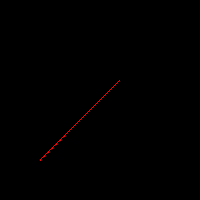

In [1]:
from PIL import Image

def draw_line(img, p1, p2, step, color):
    lx, ly = p2[0] - p1[0], p2[1] - p1[1]
    t = 0
    while t <= 1:
        x, y = p1[0] + t * lx, p1[1] + t * ly
        coord = (int(img.size[0] * x), int(img.size[1] * (1-y)))
        img.putpixel(coord, color)
        t += step

w, h = 200, 200
img = Image.new('RGBA', (w, h), 'black')
draw_line(img, (0.2, 0.2), (0.6, 0.6), 0.01, (255, 0, 0, 255))
display(img)

我们观察到`while t <= 1: t += step`这一层循环。由于计算机只能表示离散地数列，而无法表示连续的取值范围，我们只能通过一个极小数，0.01，的步进来拟合连续的表达。如果我们把这一个步进的步长取得过小，则会大幅度增加计算机的计算负担，实际上，当步长过小时，而我们整张图片的大小却只有 200x200 像素，这就意味着，每一小步增长甚至没有超出一个像素，那么有大量的像素被重新计算和重新着色。

如果我们将步长取得过大，那么线段则会发生断裂的现象。

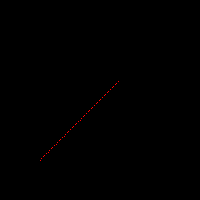

In [2]:
w, h = 200, 200
img = Image.new('RGBA', (w, h), 'black')
draw_line(img, (0.2, 0.2), (0.6, 0.6), 0.02, (255, 0, 0, 255))
display(img)

很显然，对于这个算法，我们必须精确控制参数`t`的取值，才能得到完整的，同时又不过多绘制的线段。